<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW2_99210301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIP HW2

Ali Safarpoor Dehkordi

99210301



# imports:

In [1]:
from numpy.core.shape_base import block
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from scipy.fft import fft, fftfreq, fft2, ifft2
from  scipy import stats
from google.colab.patches import cv2_imshow
from math import exp
from sklearn.decomposition import PCA
import tifffile as tiff
from tqdm import tqdm
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import imageio

# Q1

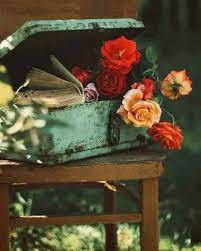

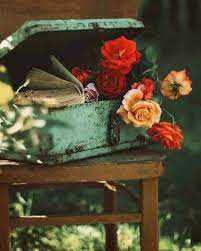

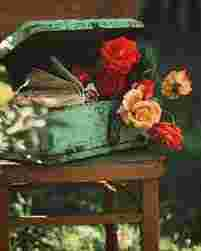

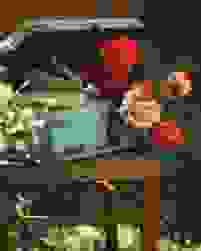

In [3]:
image_path = "image.jpeg"
image_file = Image.open(image_path)
  
# the default
image_file.save("100.jpeg", quality=100)
image_file.save("50.jpeg", quality=50)
image_file.save("10.jpeg", quality=10)
image_file.save("1.jpeg", quality=1)

# PIL.Image.open(image_path).convert('RGB')
image_file = cv2.imread('100.jpeg')
cv2_imshow(image_file)
image_file = cv2.imread('50.jpeg')
cv2_imshow(image_file)
image_file = cv2.imread('10.jpeg')
cv2_imshow(image_file)
image_file = cv2.imread('1.jpeg')
cv2_imshow(image_file)

100%|██████████| 100/100 [00:00<00:00, 515.76it/s]


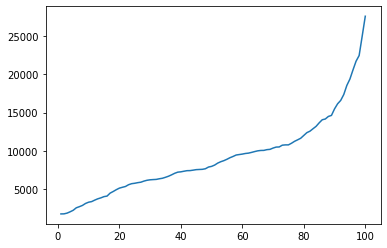

In [4]:
image_path = "image.jpeg"
image_file = Image.open(image_path)
  
# the default
l = []
for i in tqdm(range(1,101)):
    image_file.save(str(i)+".jpeg", quality=i)
    l.append(os.path.getsize(str(i)+".jpeg"))

plt.plot(range(1,101),l)


# Q2

In [5]:
x = np.arange(0, 100, 0.01)
y = np.sin(x*np.pi)

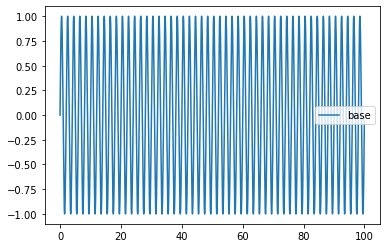

In [6]:
plt.plot(x,y,label='base')
plt.legend()
plt.show()

In [7]:
x100 = [x[i] for i in range(0,len(x),100)]
y100 = [y[i] for i in range(0,len(x),100)]

x101 = [x[i] for i in range(0,len(x),101)]
y101 = [y[i] for i in range(0,len(x),101)]

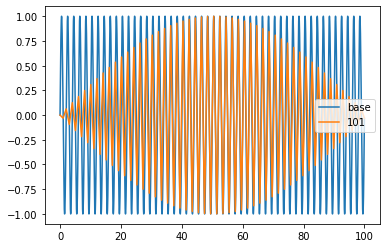

In [8]:
plt.plot(x,y,label='base')
plt.plot(x101,y101,label='101')

plt.legend()
plt.show()

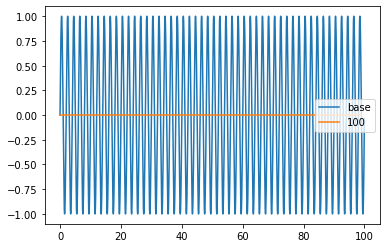

In [9]:
plt.plot(x,y,label='base')
plt.plot(x100,y100,label='100')

plt.legend()
plt.show()

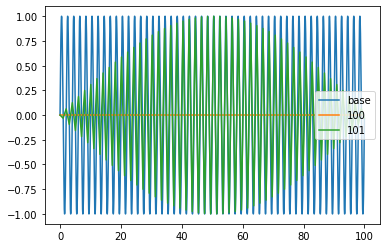

In [10]:
plt.plot(x,y,label='base')
plt.plot(x100,y100,label='100')
plt.plot(x101,y101,label='101')

plt.legend()
plt.show()

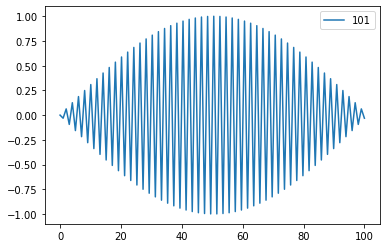

In [11]:
plt.plot(x101,y101,label='101')
plt.legend()
plt.show()

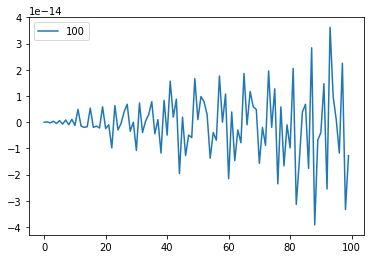

In [12]:
plt.plot(x100,y100,label='100')
plt.legend()
plt.show()

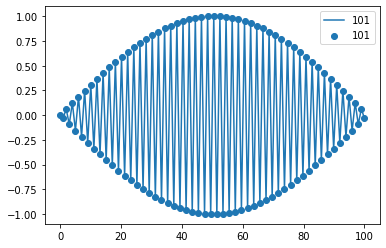

In [13]:
plt.plot(x101,y101,label='101')
plt.scatter(x101,y101,label='101')

plt.legend()
plt.show()

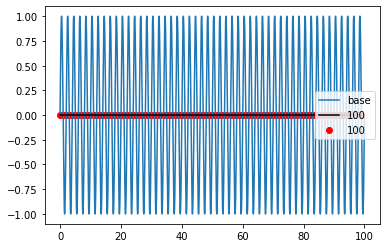

In [14]:
plt.plot(x,y,label='base')
plt.plot(x100,y100,color='black',label='100')
plt.scatter(x100,y100,color='red',label='100')

plt.legend()
plt.show()

## Q2 : part 'h'

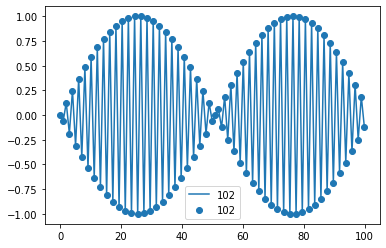

In [15]:
x102 = [x[i] for i in range(0,len(x),102)]
y102 = [y[i] for i in range(0,len(x),102)] 

plt.plot(x102,y102,label='102')
plt.scatter(x102,y102,label='102')

plt.legend()
plt.show()

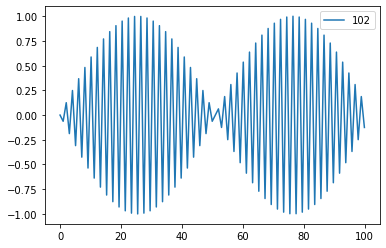

In [16]:
plt.plot(x102,y102,label='102')

plt.legend()
plt.show()

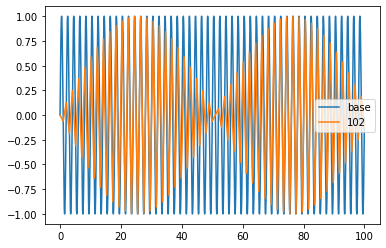

In [17]:
plt.plot(x,y,label='base')
plt.plot(x102,y102,label='102')

plt.legend()
plt.show()

for test:

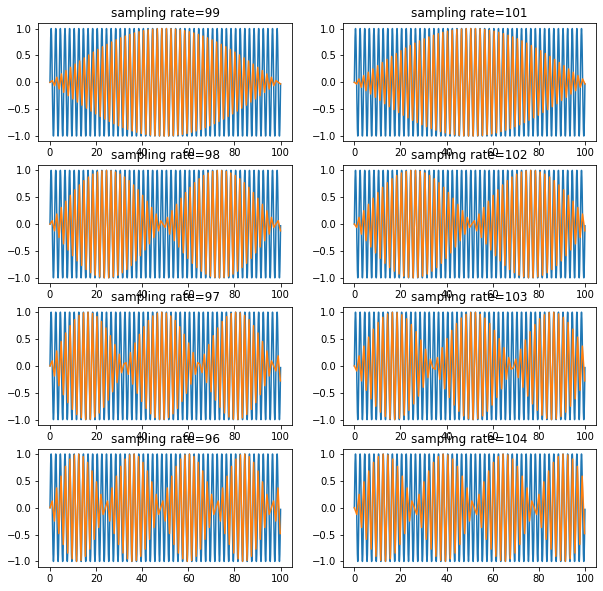

In [18]:
fig, ax = plt.subplots(4,2,figsize=(10,10))

for n in [96,97,98,99,101,102,103,104]:

    xn = [x[i] for i in range(0,len(x),n)]
    yn = [y[i] for i in range(0,len(x),n)] 

    ax2 = 1 * (n>100)
    ax1 = abs(100-n)-1
    
    ax[ax1][ax2].plot(x,y,label='base')
    ax[ax1][ax2].plot(xn,yn,label=str(n))
    ax[ax1][ax2].set_title('sampling rate='+str(n))

# Q3

## part 0

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [21]:
img = tiff.imread('DC.tif')
img.shape

(191, 1280, 307)

In [22]:
gt = tiff.imread('GT.tif')
gt.shape

(1280, 307)

gt has shown here

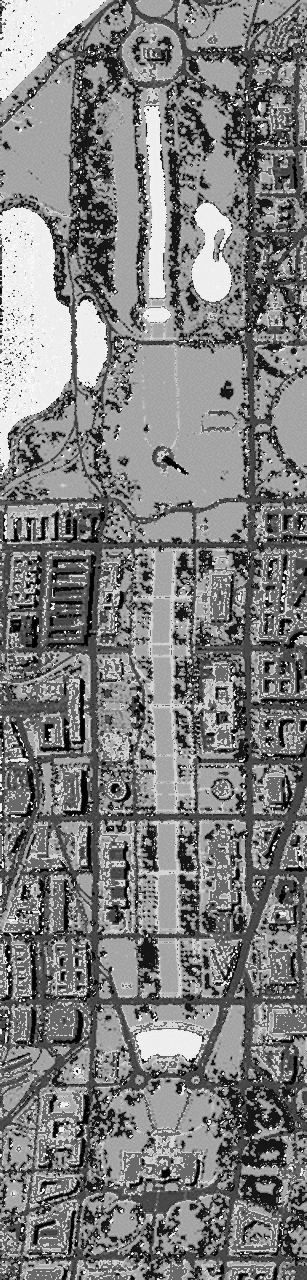

In [23]:
cv2_imshow(gt)

## part A:

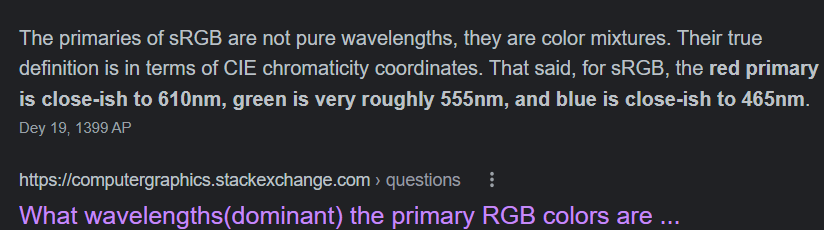

In [24]:
img = tiff.imread('DC.tif')
img.shape

(191, 1280, 307)

In [25]:
def img_normalizer_(origin_a): 
    a = np.copy(origin_a)
    mi = min(map(min,a))
    ma = max(map(max,a))
    while(mi<-2000 or ma>20000):
        for i in range(len(a)):
            for j in range(len(a[0])):
                a[i][j] = a[i][j]*0.5
        mi = min(map(min,a))
        ma = max(map(max,a))
            
    mi = min(map(min,a))
    ma = max(map(max,a))
    while(mi<0 or ma>255):
        for i in range(len(a)):
            for j in range(len(a[0])):
                a[i][j] = (a[i][j] - mi)/(ma-mi)*255
        mi = min(map(min,a))
        ma = max(map(max,a))

    print(mi,ma)
    return a

for RGB:

In [26]:
# based on Landa.txt:
b_channel = 20
g_channel = 30
r_channel = 52

In [27]:
r=r_channel
r_page = img_normalizer_(np.copy(img[r,:,:]).reshape((1280,307)))

0 255


In [28]:
g=g_channel
g_page = img_normalizer_(np.copy(img[g,:,:]).reshape((1280,307)))

0 255


In [29]:
b=b_channel
b_page = img_normalizer_(np.copy(img[b,:,:]).reshape((1280,307)))

0 255


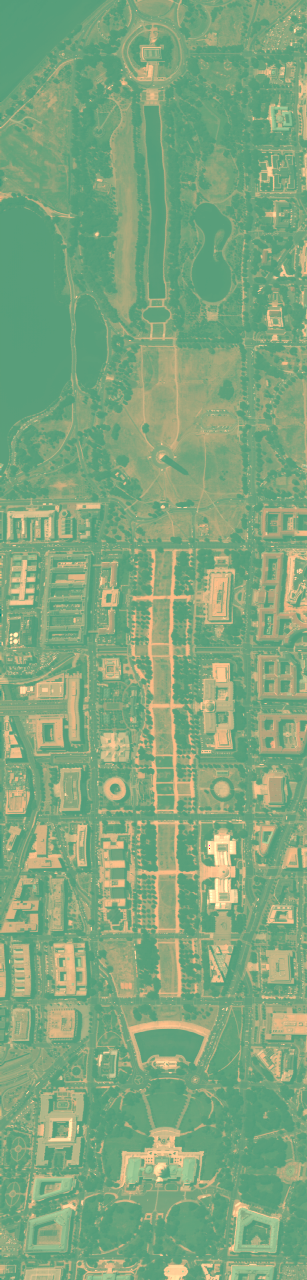

In [30]:
rgb_page = np.dstack((b_page*0.9,g_page*1.2,r_page*2))
cv2_imshow(rgb_page)

for sRGB:

In [31]:
# based on Landa.txt:
b_channel = 18 #465
g_channel = 36 #555
r_channel = 44 #610

In [32]:
r=r_channel
r_page = img_normalizer_(np.copy(img[r,:,:]).reshape((1280,307)))

0 255


In [33]:
g=g_channel
g_page = img_normalizer_(np.copy(img[g,:,:]).reshape((1280,307)))

0 255


In [34]:
b=b_channel
b_page = img_normalizer_(np.copy(img[b,:,:]).reshape((1280,307)))

0 255


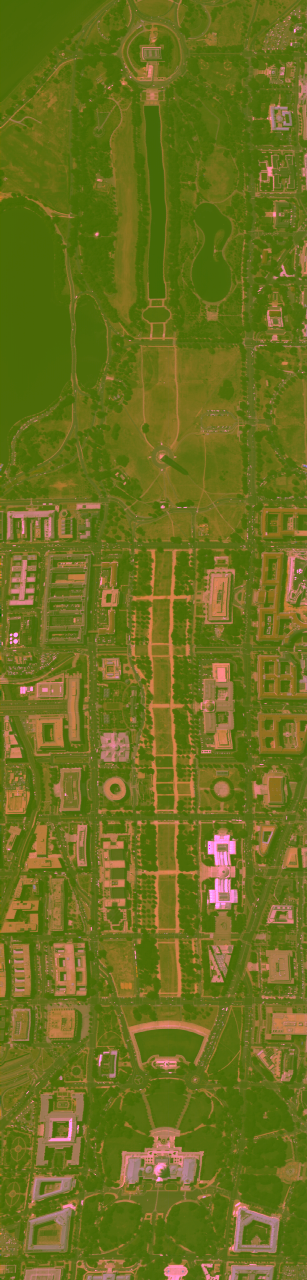

In [35]:
rgb_page = np.dstack((b_page*2.2,g_page*0.8,r_page*2))
cv2_imshow(rgb_page)

with remove negatives:

In [36]:
def img_normalizer_(origin_a): 
    a = np.copy(origin_a)
    ma = max(map(max,a))
    for i in range(len(a)):
            for j in range(len(a[0])):
                a[i][j] = max(0,a[i][j])
    while(ma>20000):
        for i in range(len(a)):
            for j in range(len(a[0])):
                a[i][j] = a[i][j]*0.5
        ma = max(map(max,a))
            
    ma = max(map(max,a))
    while(ma>255):
        for i in range(len(a)):
            for j in range(len(a[0])):
                a[i][j] = (a[i][j])/(ma)*255
 
        ma = max(map(max,a))

    print(ma)
    return a

In [37]:
# based on Landa.txt:
b_channel = 18 #465
g_channel = 36 #555
r_channel = 44 #610

In [38]:
r=r_channel
r_page = img_normalizer_(np.copy(img[r,:,:]).reshape((1280,307)))

255


In [39]:
g=g_channel
g_page = img_normalizer_(np.copy(img[g,:,:]).reshape((1280,307)))

255


In [40]:
b=b_channel
b_page = img_normalizer_(np.copy(img[b,:,:]).reshape((1280,307)))

255


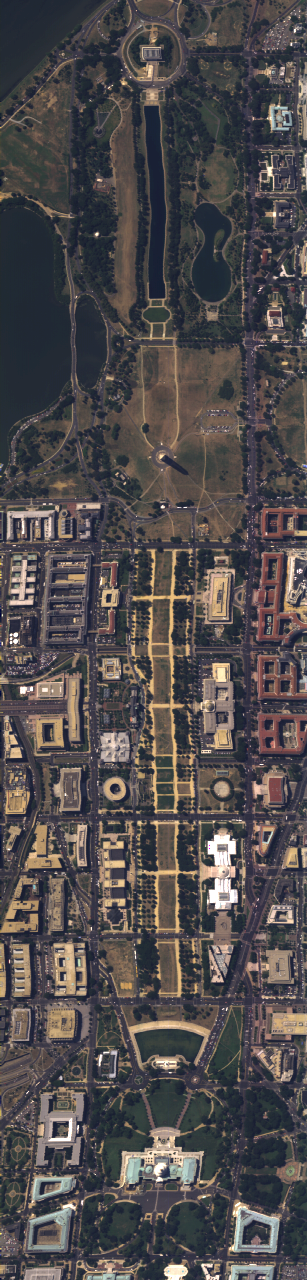

In [41]:
rgb_page = np.dstack((b_page*2.5,g_page*2.5,r_page*2.5))
cv2_imshow(rgb_page)

Now I am happy !!!! :)))

## Part b:

In [42]:
img = tiff.imread('DC.tif')
img.shape

(191, 1280, 307)

In [43]:
img.shape

(191, 1280, 307)

In [44]:
n = 3
pca = PCA(n_components=n)

In [45]:
flat_img = np.copy(img).reshape(191,-1) 
flat_img = flat_img.transpose()

flat_img.shape

(392960, 191)

In [46]:
out3 = pca.fit_transform(flat_img)
out3.shape

(392960, 3)

In [47]:
print(out3.shape)
out3 = out3.reshape((1280,307,-1))
print(out3.shape)

(392960, 3)
(1280, 307, 3)


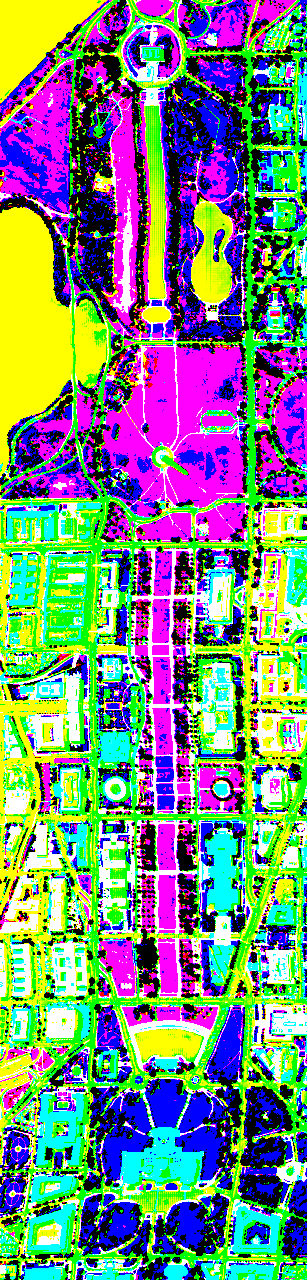

In [48]:
cv2_imshow(out3)

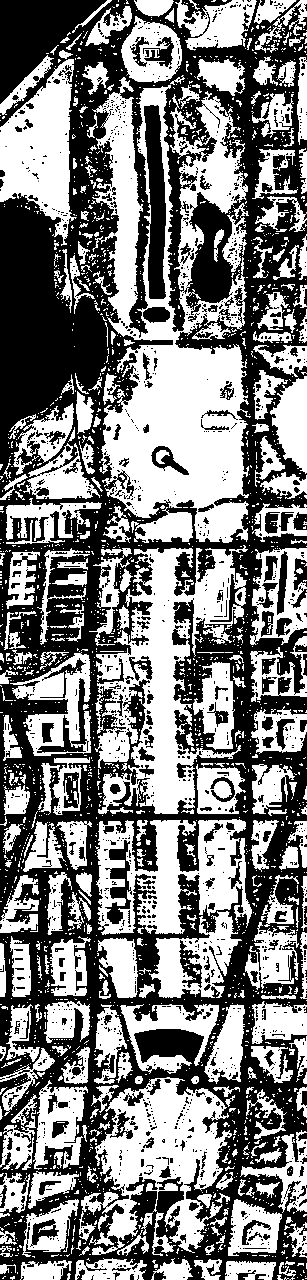

-----------------------------------


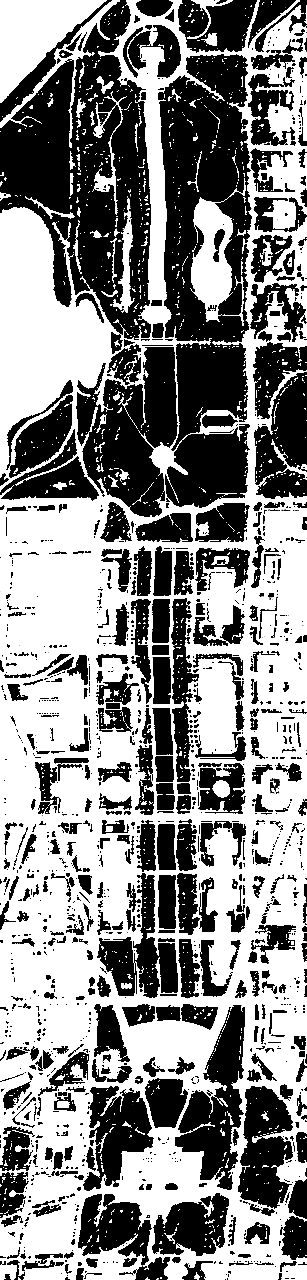

-----------------------------------


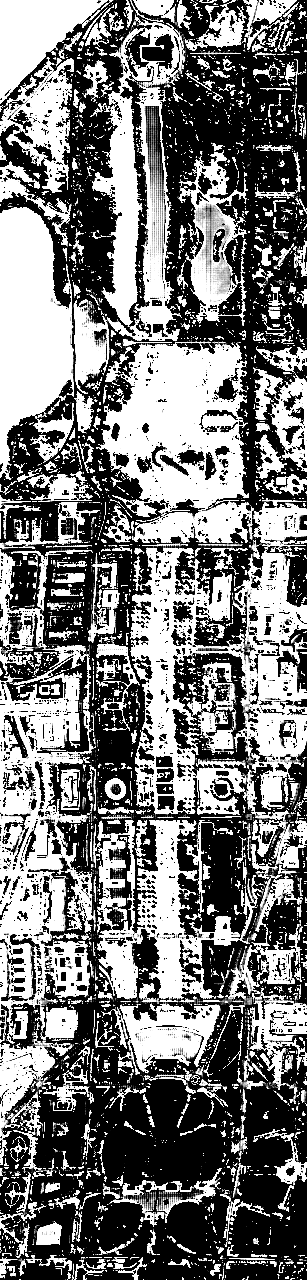

In [49]:
cv2_imshow(out3[:,:,0])
print("-----------------------------------")
cv2_imshow(out3[:,:,1])
print("-----------------------------------")
cv2_imshow(out3[:,:,2])

In [50]:
n = 1
pca = PCA(n_components=n)

In [51]:
flat_img = np.copy(img).reshape(191,-1) 
flat_img = flat_img.transpose()

flat_img.shape

(392960, 191)

In [52]:
out1 = pca.fit_transform(flat_img)
out1.shape

(392960, 1)

In [53]:
print(out1.shape)
out1 = out1.reshape((1280,307))
print(out1.shape)

(392960, 1)
(1280, 307)


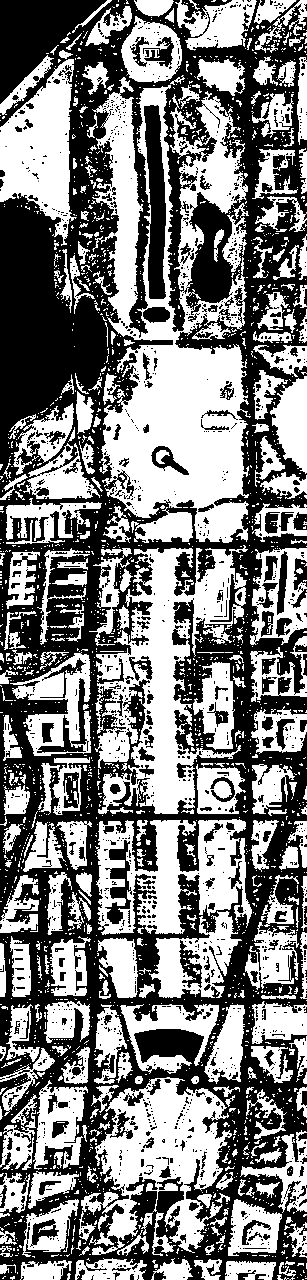

In [54]:
cv2_imshow(out1)

## part c

In [55]:
imggt = np.copy(gt)

In [56]:
imggt.shape

(1280, 307)

In [57]:
imggt.reshape(-1)

array([ 49,  50, 232, ...,  67,  67,  73], dtype=uint8)

In [58]:
h = np.zeros(256)

for i in tqdm(imggt):
    h[i]+=1

100%|██████████| 1280/1280 [00:00<00:00, 59257.28it/s]


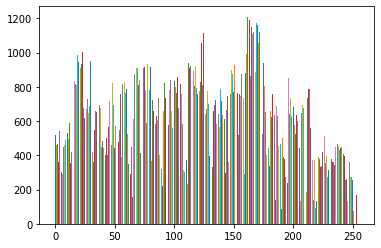

In [59]:
for i in range(256):
    if h[i]<=-200:
        plt.bar(i,2000)
    else:
        plt.bar(i,h[i])
plt.show()

In [60]:
# df = pd.DataFrame(imggt,index=imggt[:,0])
# hist = df.hist(bins=256) # to time comsuming so I changed my path to count it with my fingers

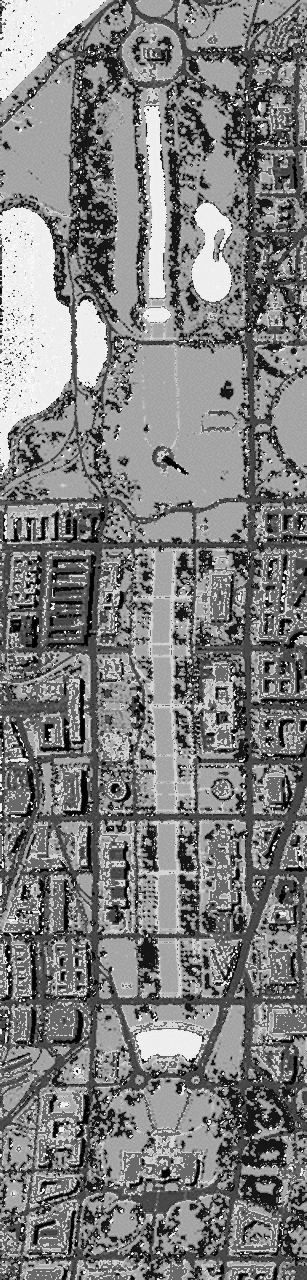

In [61]:
cv2_imshow(imggt)

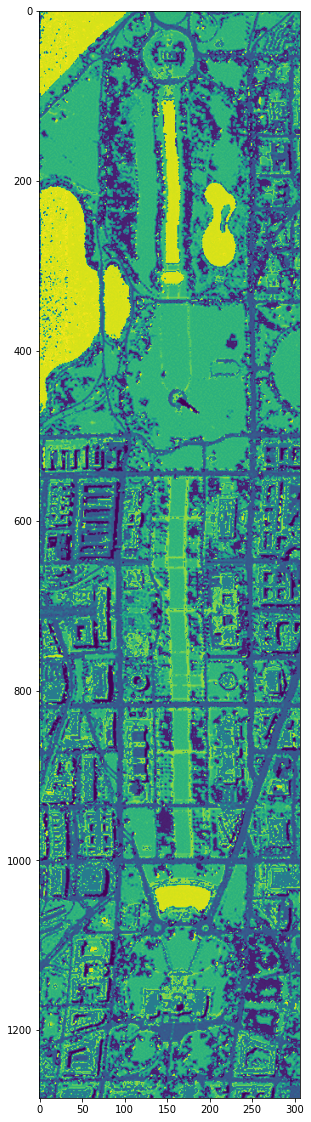

In [62]:
gt = imageio.imread('GT.tif')

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(20)

plt.imshow(gt)

In [63]:
img.shape , gt.shape

((191, 1280, 307), (1280, 307))

In [64]:
x = img.reshape(191,-1)
y = gt.reshape(-1)
x = x.transpose()

x.shape , y.shape

((392960, 191), (392960,))

In [65]:
def img_normalizer(x,max_val=255):
    shape_ = x.shape
    print(shape_)
    x = x.reshape(-1)
    mi = min(x)
    ma = max(x)
    x = (x-mi)/(ma-mi)*max_val
    
    x = x.reshape(shape_)
    return x

In [66]:
a = [[0,1],[2,3]]
a = np.array(a)
img_normalizer(a)

(2, 2)


array([[  0.,  85.],
       [170., 255.]])

In [67]:
def LDA_function(n_components,x,y):
    lda = LDA(n_components=n_components)
    lda.fit_transform(x, y)
    out = lda.transform(x)
    out = out.reshape((1280,307,n_components))
    normal_out = img_normalizer(out)
    return normal_out

(1280, 307, 1)


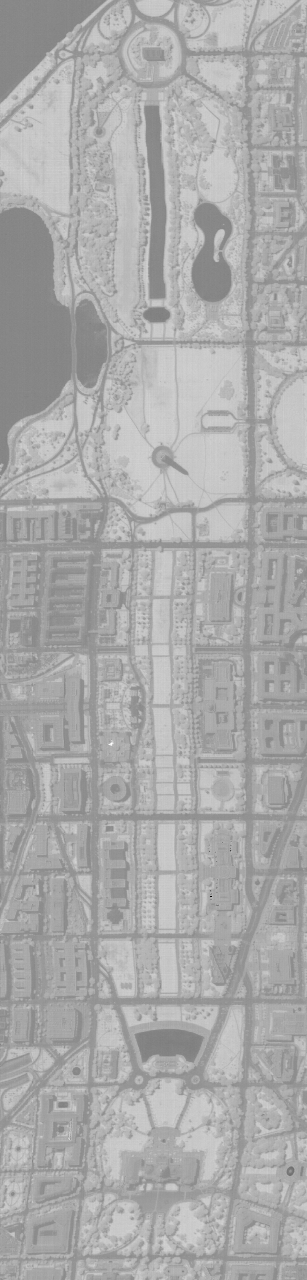

In [68]:
n_components = 1
normal_out1 = LDA_function(n_components,x,y)
cv2_imshow(normal_out1)

(1280, 307, 3)


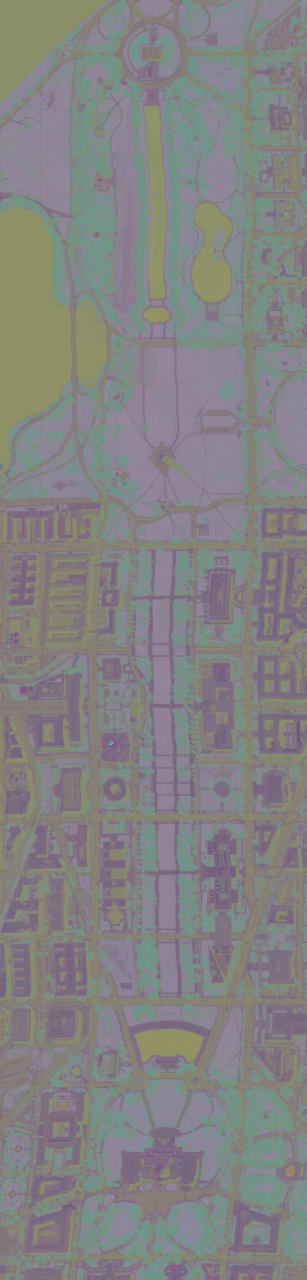

In [69]:
n_components = 3
normal_out3 = LDA_function(n_components,x,y)
cv2_imshow(normal_out3)

In [70]:
def draw_histogram(x):
    vals = x.mean(axis=2).flatten()
    # plot histogram with 255 bins
    b, bins, patches = plt.hist(vals, 255)
    plt.xlim([0,255])
    plt.show()

In [71]:
def rerange(range_ , img):
    s = img.shape
    img = img.reshape(-1)
    for i in tqdm(range(len(img))):
        img[i] = min(range_[1],max(range_[0],img[i]))
    img = img_normalizer(img)
    img = img.reshape(s)
    return img


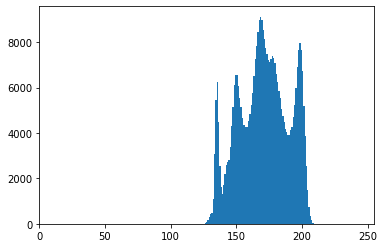

In [72]:
draw_histogram(normal_out1)

In [73]:
#based on below histogram
choosed_range = [120,215]

In [74]:
normal_out1 = rerange(choosed_range , normal_out1)

100%|██████████| 392960/392960 [00:00<00:00, 778484.66it/s]

(392960,)


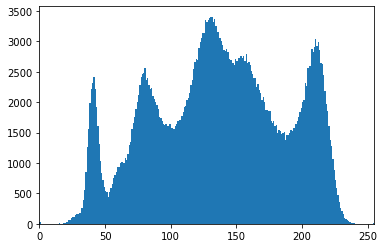

In [75]:
draw_histogram(normal_out1)

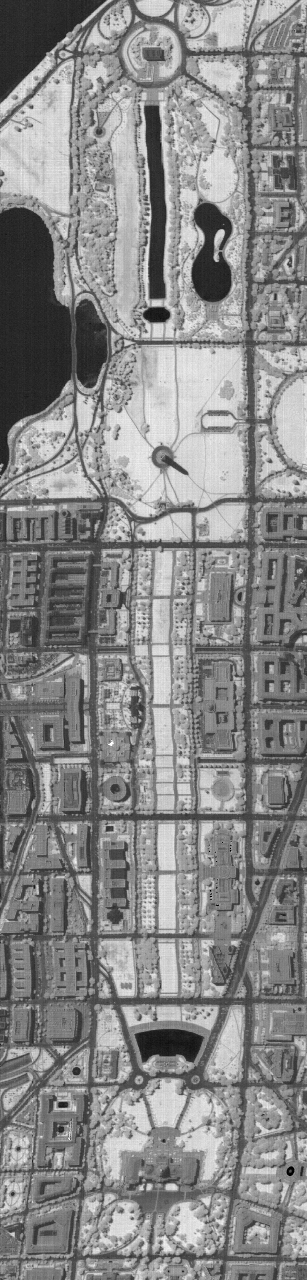

In [76]:
cv2_imshow(normal_out1)

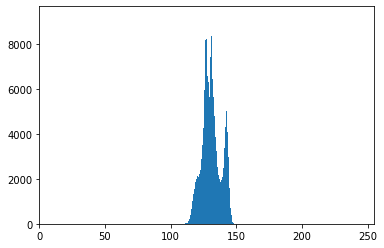

In [77]:
draw_histogram(normal_out3)

In [78]:
#based on below histogram
choosed_range = [115,145]

In [79]:
normal_out3 = rerange(choosed_range , normal_out3)

100%|██████████| 1178880/1178880 [00:01<00:00, 806863.98it/s]


(1178880,)


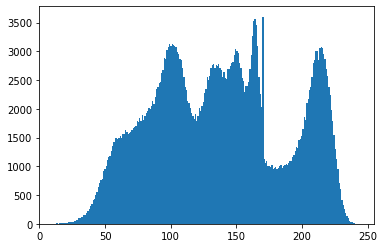

In [80]:
draw_histogram(normal_out3)

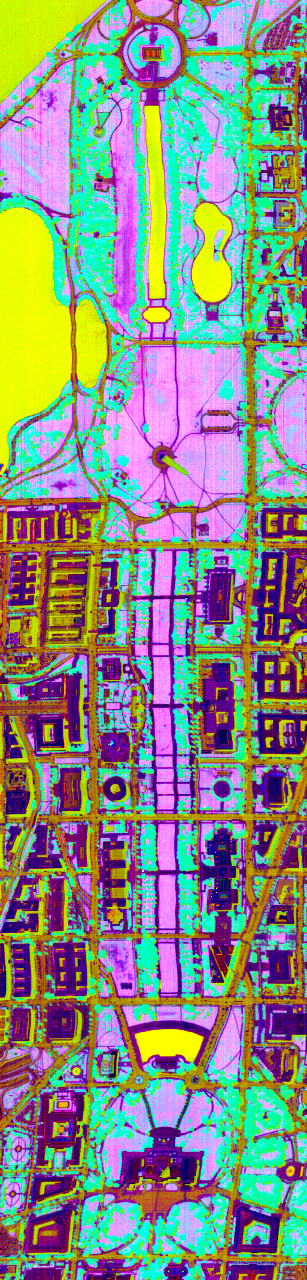

In [81]:
cv2_imshow(normal_out3)